In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import multiprocessing 
from sklearn.preprocessing import MinMaxScaler

In [3]:
# reading the CSV file into pandas dataframe
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers.

In [4]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
vehicle_df.shape

(846, 19)

In [6]:
vehicle_df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [7]:
vehicle_df[vehicle_df.isnull().any(axis=1)]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [8]:
vehicle_df = vehicle_df.fillna(vehicle_df.mean())

In [9]:
vehicle_df[vehicle_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [10]:
le_class = LabelEncoder()
vehicle_df["class"] = le_class.fit_transform(vehicle_df["class"])
vehicle_df["class"].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

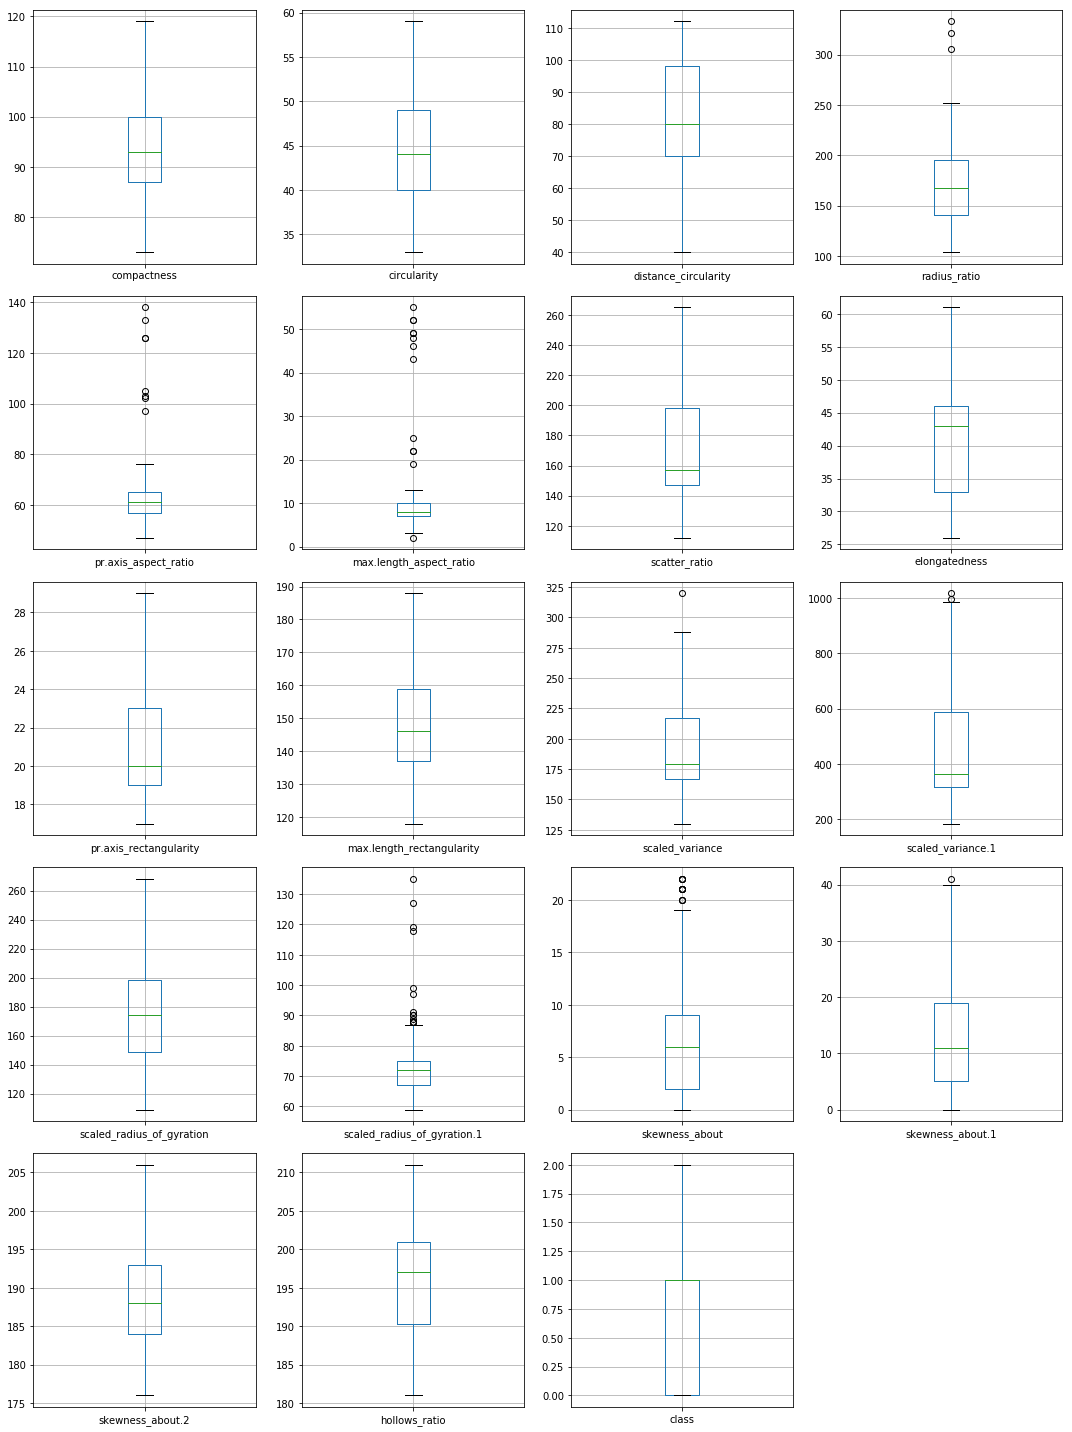

In [11]:
fig, axes = plt.subplots(5,4,figsize=(15,20)) # create figure and axes

for i,el in enumerate(list(vehicle_df.columns.values)[:]):
    a = vehicle_df.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[4,3]) # remove empty subplot
plt.tight_layout()
plt.show()

In [12]:
# Removing outliers and assigning it to new dataframe

Q1 = vehicle_df.quantile(0.25)
Q3 = vehicle_df.quantile(0.75)
IQR = Q3 - Q1

vehicle_df = vehicle_df[~((vehicle_df < (Q1 - 1.5 * IQR)) |(vehicle_df > (Q3 + 1.5 * IQR))).any(axis=1)]
vehicle_df.shape

(813, 19)

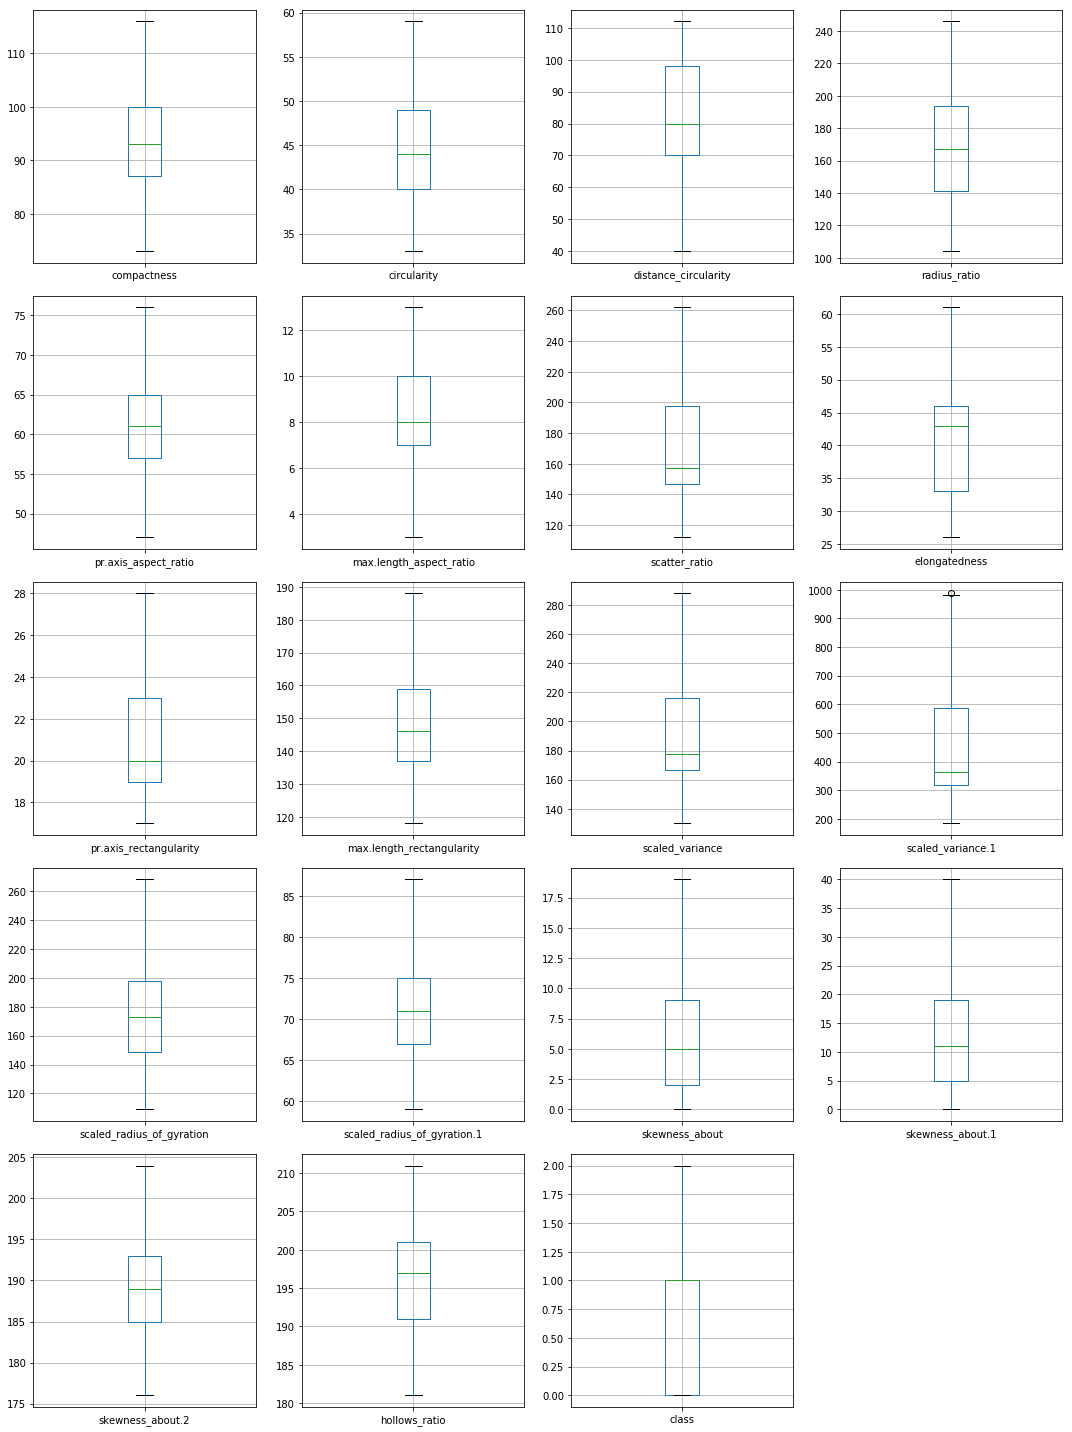

In [13]:
fig, axes = plt.subplots(5,4,figsize=(15,20)) # create figure and axes

for i,el in enumerate(list(vehicle_df.columns.values)[:]):
    a = vehicle_df.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[4,3]) # remove empty subplot
plt.tight_layout()
plt.show()

### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why.

C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


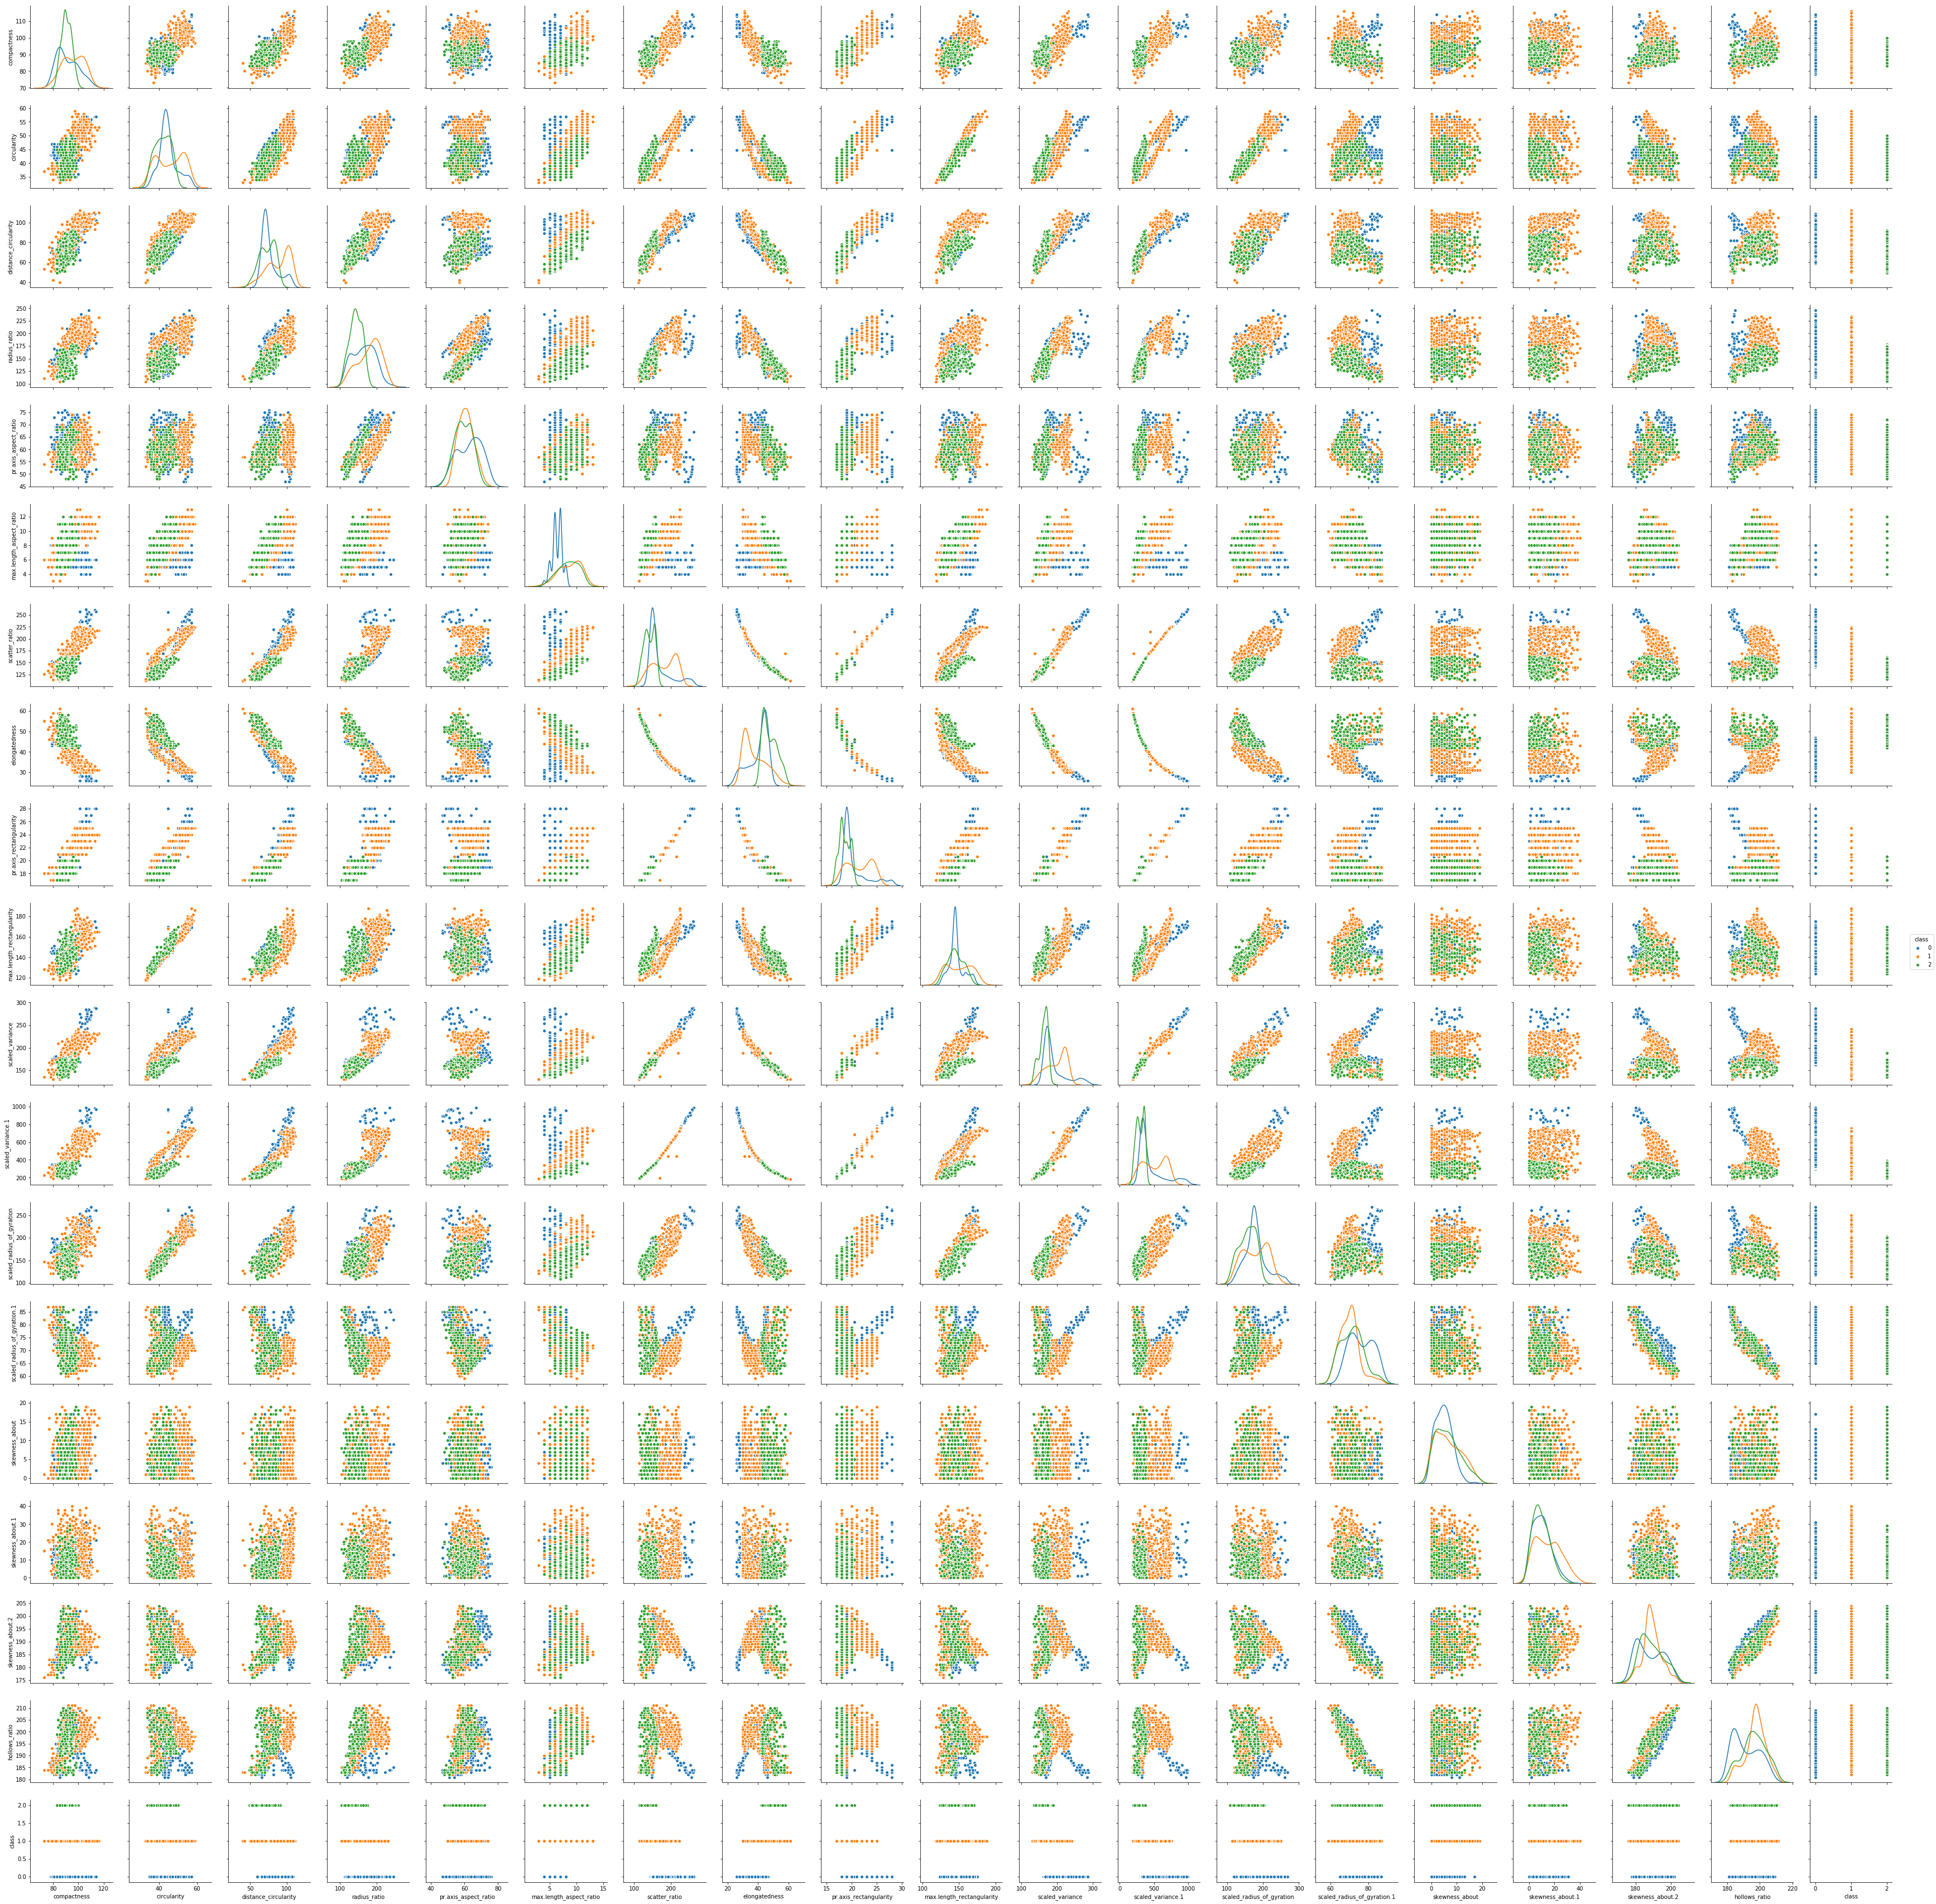

In [14]:
sns.pairplot(vehicle_df,hue='class',diag_kind='kde')

In [15]:
vehicle_df_corr = vehicle_df.corr()
vehicle_df_corr[["class"]]

class
compactness                 -0.028066
circularity                 -0.151426
distance_circularity        -0.058983
radius_ratio                -0.225840
pr.axis_aspect_ratio        -0.216783
max.length_aspect_ratio      0.371072
scatter_ratio               -0.283371
elongatedness                0.337823
pr.axis_rectangularity      -0.251222
max.length_rectangularity   -0.025047
scaled_variance             -0.328567
scaled_variance.1           -0.282390
scaled_radius_of_gyration   -0.241659
scaled_radius_of_gyration.1 -0.284027
skewness_about               0.128904
skewness_about.1            -0.013087
skewness_about.2             0.061326
hollows_ratio                0.231102
class                        1.000000

In [16]:
X=vehicle_df.drop(['class'],axis=1)
Y=vehicle_df[['class']]

best = SelectKBest(chi2, k=8).fit(X, Y)
X_new = best.transform(X)
print(X_new[0:5,:])

[[ 83. 178. 162.  42. 176. 379. 184.  16.]
 [ 84. 141. 149.  45. 170. 330. 158.  14.]
 [106. 209. 207.  32. 223. 635. 220.   9.]
 [ 82. 159. 144.  46. 160. 309. 127.  10.]
 [106. 172. 255.  26. 280. 957. 264.   9.]]


In [17]:
mask = best.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, X.columns):
    if bool:
        new_features.append(feature)
dataframe = pd.DataFrame(X_new, columns=new_features)
dataframe.head()

distance_circularity  radius_ratio  scatter_ratio  elongatedness  \
0                  83.0         178.0          162.0           42.0   
1                  84.0         141.0          149.0           45.0   
2                 106.0         209.0          207.0           32.0   
3                  82.0         159.0          144.0           46.0   
4                 106.0         172.0          255.0           26.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            280.0              957.0                      264.0   

   skewness_about.1  
0              16.0  
1              14.0  
2               9.0  
3              10.0  
4               9.0

In [18]:
# feature selection

model = ExtraTreesClassifier(random_state = 10)
model.fit(X, Y)
print(model.feature_importances_)

# importances of each feature array
importances = model.feature_importances_ 

#creating an index array with the number of features
idx = np.arange(0, X.shape[1]) 

#considering the features whose importance is greater than the mean importance
considered_features = idx[importances > np.mean(importances)]


dataframe = pd.DataFrame(columns=considered_features)
for i in considered_features:
    print(i)

[0.03579918 0.0489738  0.04245444 0.03429209 0.06652791 0.13310339
 0.07359302 0.06438625 0.08920656 0.08453742 0.06397031 0.07260914
 0.02245679 0.04941117 0.02202046 0.0169374  0.03241192 0.04730874]
4
5
6
7
8
9
10
11


C:\Users\rames\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [19]:
minimized_df = X.iloc[:,[4,5,6,7,8,9,10,11]]
minimized_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  
0            176.0              379.0  
1            170.0              330.0  
2            223.0              635.0  
3            160.0              309.0  
5            280.0              957.0

### here we are choosing features based on weighted mean, but normally we remove -vely correlated features.

# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [20]:
pca_X=vehicle_df.drop(['class'],axis=1)
pca_Y=vehicle_df[['class']]

X_std = StandardScaler().fit_transform(pca_X)

[ 54.36  73.11  79.82  86.13  91.1   94.75  96.54  97.8   98.42  98.84
  99.18  99.42  99.58  99.73  99.84  99.93  99.98 100.  ]


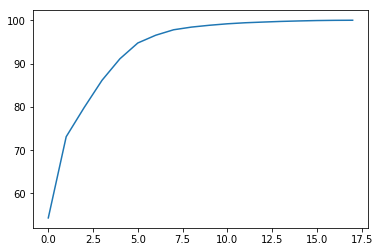

In [21]:
pca = PCA(n_components=18)
pca.fit(X_std)
exp_var=pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var)
plt.plot(var)

#### PCA with reduced dimensions, n_components as 7 by above plot

In [22]:
pca = PCA(n_components=7)
pca.fit(X_std)
pca_X1=pca.fit_transform(X_std)

print(pca_X1)

[[ 0.58926962 -0.65496698 -0.56668288 ... -0.85344755 -1.8360871
  -0.15864565]
 [-1.52704237 -0.32730308 -0.24860192 ... -0.28364297 -0.09266569
   0.20898042]
 [ 3.96810099  0.2391699  -1.23101563 ...  0.91845893 -0.64955634
   0.82657655]
 ...
 [ 5.18746908 -0.17187655 -0.58793501 ... -1.35124137  0.22379882
   0.88726448]
 [-3.32342852 -1.09484252  1.93151081 ... -0.52711369 -0.03191929
  -0.26733286]
 [-5.01458428  0.43221954  1.31650519 ... -0.16761795  0.34623126
  -0.40926822]]


# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [23]:
svm_X=vehicle_df.drop(['class'],axis=1)
svm_Y=vehicle_df[['class']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(svm_X, svm_Y, test_size=.3, 
                                                    stratify=svm_Y, 
                                                    random_state=42)

In [25]:
svc = svm.SVC(C=1, kernel='rbf', gamma=1).fit(X_train, y_train)
svc.score(X_test, y_test)

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
svc = svm.SVC(C=1, kernel='linear', degree=3, gamma=1).fit(X_train, y_train)
svc.score(X_test, y_test)

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9221311475409836

In [28]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [29]:
param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [0.01, 0.05, 0.5, 1]    } ]
gs = GridSearchCV(estimator=svc, param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(X_train_minmax, y_train)
gs.best_estimator_
gs.best_score_

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.961335676625659

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
#cross validation
scores = cross_val_score(gs, X_test, y_test, cv=5)
scores

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rames\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([0.94      , 0.92      , 0.91666667, 0.91666667, 0.85416667])